In [1]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Symbolic Case

You know the formula explicitly but don't really feel like using a pencil to take the derivative

$$f(x) = ... $$

**Example:** $$f(x) = e^{-a\sin(x^2)}\cdot \sin(b^x) \cdot \ln(c\sin^2(x)/x)$$

First Define all your symbols in sympy

In [2]:
x, a, b, c = smp.symbols('x a b c', real=True)

In [3]:
x**2+smp.exp(a)

x**2 + exp(a)

In [4]:
x, a, b, c = smp.symbols('x a b c', real=True)
f = smp.exp(-a*smp.sin(x**2)) * smp.sin(b**x) * smp.log(c*smp.sin(x)**2 /x)

Compute derivatives using `smp.diff(f, x)` where $f$ is the function you want to take the derivative of and $x$ is the variable you are taking the derivative with respect to.

In [5]:
dfdx = smp.diff(f, x)
dfdx

-2*a*x*exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) + x*(2*c*sin(x)*cos(x)/x - c*sin(x)**2/x**2)*exp(-a*sin(x**2))*sin(b**x)/(c*sin(x)**2)

Can take the nth derivative $d^n f/dx^n$ by putting the optional argument at the end `smp.diff(f,x,n)`.

In [6]:
d4fdx4 = smp.diff(f, x, 4)
#d4fdx4

Can then compute numerical values by plugging in numbers

In [7]:
d4fdx4.subs([(x,4),(a,1),(b,2),(c,3)]).evalf()

-73035.8044625845

Can also convert to a numerical function for plotting

In [8]:
d4fdx4_f = smp.lambdify((x,a,b,c), d4fdx4)

Define $x$ and $y$ arrays using the numerical function above

In [9]:
x = np.linspace(1,2,100)

In [10]:
x = np.linspace(1,2,100)
y = d4fdx4_f(x, a=1, b=2, c=3)

Plot

Text(0.5, 0, '$x$')

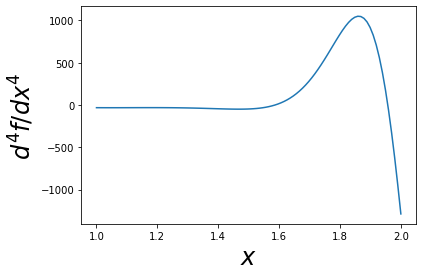

In [11]:
plt.plot(x,y)
plt.ylabel('$d^4 f / dx^4$', fontsize=24)
plt.xlabel('$x$', fontsize=24)

# Numerical Case

Your given data like such

In [12]:
x, y = np.loadtxt('../data/sample_data1.txt')

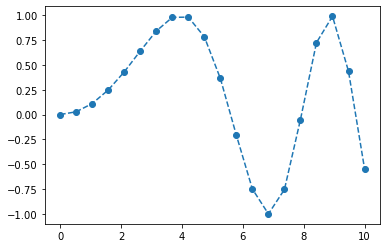

In [13]:
plt.plot(x, y, 'o--')

There are a few ways to go about this.

**1: The basic way**

In [14]:
dydx = np.gradient(y,x)

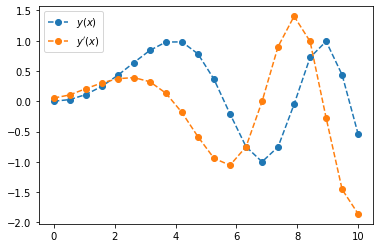

In [15]:
plt.plot(x,y, 'o--', label='$y(x)$')
plt.plot(x,dydx, 'o--', label='$y\'(x)$')
plt.legend()

This way works fine if the data is smooth but not if the data is noisy:

In [16]:
x, y = np.loadtxt('../data/sample_data2.txt')
dydx = np.gradient(y,x)

Plot the noisey data

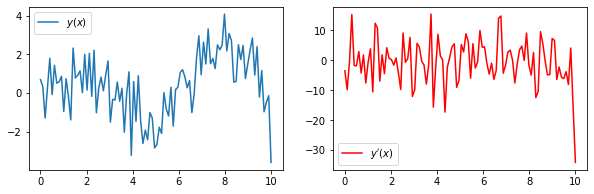

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(x,y, label='$y(x)$')
ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
[a.legend() for a in ax]
plt.show()

Noise gets amplified in the derivative! This leads us to technique 2:

**2. The Clever Way**

Smooth data then take derivative. Consider the following new covid cases per day data

In [18]:
x, y = np.loadtxt('../data/coviddata.txt')
dydx = np.gradient(y,x)

Taking the derivative naively gives a bad result

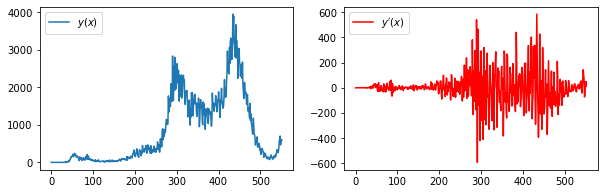

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(x,y, label='$y(x)$')
ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
[a.legend() for a in ax]
plt.show()

Smooth the data by convolving it with a rectangle

In [20]:
filt = np.ones(15)/15

In [21]:
y_smooth = np.convolve(y, filt, mode='valid')
dysdx = np.gradient(y_smooth, x[7:-7])

Plot

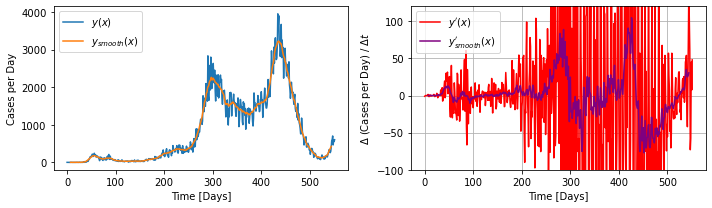

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(x,y, label='$y(x)$')
ax[0].plot(x[7:-7], y_smooth, label=r'$y_{{smooth}}(x)$')
ax[1].plot(x,dydx, label='$y\'(x)$', color='r')
ax[1].plot(x[7:-7],dysdx, label='$y_{smooth}\'(x)$', color='purple')
ax[1].set_ylim(-100,120)
ax[1].grid()
[a.legend() for a in ax]
[a.set_xlabel('Time [Days]') for a in ax]
ax[0].set_ylabel('Cases per Day')
ax[1].set_ylabel('$\Delta$ (Cases per Day) / $\Delta t$')
fig.tight_layout()
plt.show()

# Quasi-Symbolic Case

In this case you know your function $f(x) = ...$ but the function is not given by a typical expression. For example.

$$f(u) = \text{max} \left\{ \left|e^{-x_iu^2} - y_i\right| \right\}  $$

for some array of $x_i$'s and $y_i$'s

In [23]:
x = np.linspace(0, 1, 500)
y = np.exp(-x*2.15**2) + 0.1*np.random.randn(len(x))

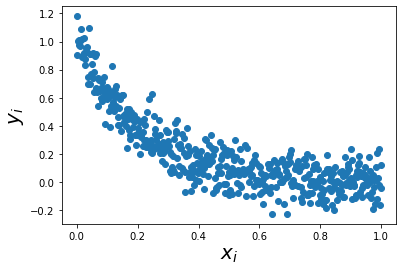

In [24]:
plt.scatter(x,y)
plt.xlabel('$x_i$', fontsize=20)
plt.ylabel('$y_i$', fontsize=20)
plt.show()

Define function

In [25]:
def f(u):
    return max(np.abs(np.exp(-x*u**2) -y))

Compute the function values

In [26]:
u = np.linspace(0,10,40)
f_u = np.vectorize(f)(u)

Plot

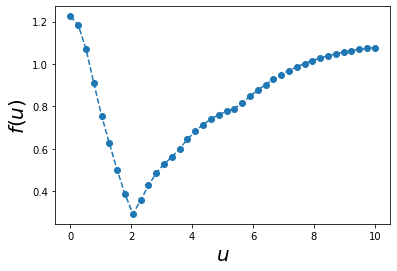

In [27]:
plt.plot(u, f_u, 'o--')
plt.xlabel('$u$', fontsize=20)
plt.ylabel('$f(u)$', fontsize=20)
plt.show()

You could always just take the derivative of the numerical array `f_u`, but there is a specific derivative function better assigned for this

Compute derivative

In [28]:
dfdu = np.vectorize(derivative)(f, u, dx=1e-6)

Plot

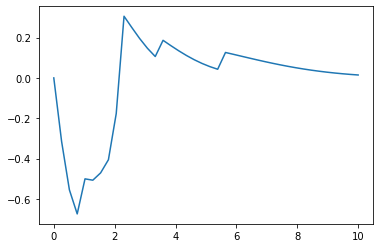

In [29]:
plt.plot(u, dfdu)